## Step 1

In [1]:
# Load the packages

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data. 
# EPL results for the 2017/18 season

EPL18 = pd.read_excel('Assignment Data/Week 1/EPL2017-18.xlsx')
print(EPL18.columns.tolist())

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


## Step 2

In [3]:
# Our data is in the form of game results. We first identify whether the result was a win for the home team (H),
# the away team (A) or a draw (D). We also create the counting variable.

EPL18['hwinvalue']=np.where(EPL18['FTR']=='H',1,np.where(EPL18['FTR']=='D',.5,0))
EPL18['awinvalue']=np.where(EPL18['FTR']=='A',1,np.where(EPL18['FTR']=='D',.5,0))
EPL18['count']=1

## Step 3

In [4]:
# divide data into two halves- games before Jan 1 2018 (call them EPL2017) and games after (call them EPL2018)

EPL2017 = EPL18[EPL18.Date < 20180000]
EPL2017


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,hwinvalue,awinvalue,count
0,20170811,Arsenal,Leicester,4,3,H,1.0,0.0,1
1,20170812,Brighton,Man City,0,2,A,0.0,1.0,1
2,20170812,Chelsea,Burnley,2,3,A,0.0,1.0,1
3,20170812,Crystal Palace,Huddersfield,0,3,A,0.0,1.0,1
4,20170812,Everton,Stoke,1,0,H,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...
204,20171230,Man United,Southampton,0,0,D,0.5,0.5,1
205,20171230,Newcastle,Brighton,0,0,D,0.5,0.5,1
206,20171230,Watford,Swansea,1,2,A,0.0,1.0,1
207,20171231,Crystal Palace,Man City,0,0,D,0.5,0.5,1


In [5]:
EPL2018 = EPL18[EPL18.Date > 20180000]
EPL2018


,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,hwinvalue,awinvalue,count
209,20180101,Brighton,Bournemouth,2,2,D,0.5,0.5,1
210,20180101,Burnley,Liverpool,1,2,A,0.0,1.0,1
211,20180101,Everton,Man United,0,2,A,0.0,1.0,1
212,20180101,Leicester,Huddersfield,3,0,H,1.0,0.0,1
213,20180101,Stoke,Newcastle,0,1,A,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...
375,20180513,Newcastle,Chelsea,3,0,H,1.0,0.0,1
376,20180513,Southampton,Man City,0,1,A,0.0,1.0,1
377,20180513,Swansea,Stoke,1,2,A,0.0,1.0,1
378,20180513,Tottenham,Leicester,5,4,H,1.0,0.0,1


## Step 4 (home team)

In [6]:
# First half the season

# We have to create separate dfs to calculate home team and away team performance.
# Here is the home team df, including only the variables we need.

EPL2017home = EPL2017.groupby(['HomeTeam'])['count','hwinvalue', 'FTHG','FTAG'].sum().reset_index()
EPL2017home = EPL2017home.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})
EPL2017home

,team,Ph,hwinvalue,FTHGh,FTAGh
0,Arsenal,10,8.5,25,10
1,Bournemouth,11,4.5,14,17
2,Brighton,10,5.5,10,12
3,Burnley,10,6.0,7,6
4,Chelsea,11,8.5,21,7
5,Crystal Palace,11,5.0,14,18
6,Everton,10,6.5,17,13
7,Huddersfield,11,6.0,10,12
8,Leicester,10,5.0,13,14
9,Liverpool,11,8.5,21,4


In [7]:
# Now we create the mirror image df for the away team results.

EPL2017away = EPL2017.groupby('AwayTeam')['count','awinvalue', 'FTHG','FTAG'].sum().reset_index()
EPL2017away = EPL2017away.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
EPL2017away

,team,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,11,5.0,16,13
1,Bournemouth,10,3.0,15,6
2,Brighton,11,3.0,13,5
3,Burnley,11,6.5,11,11
4,Chelsea,10,7.0,7,18
5,Crystal Palace,10,2.5,14,4
6,Everton,11,3.5,19,8
7,Huddersfield,10,3.0,20,8
8,Leicester,11,5.0,18,18
9,Liverpool,10,6.5,20,27


## Step 5 (home team)

In [8]:
# Merge the home team and away team results

EPL17 = pd.merge(EPL2017home, EPL2017away, on = ['team'])
EPL17

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,10,8.5,25,10,11,5.0,16,13
1,Bournemouth,11,4.5,14,17,10,3.0,15,6
2,Brighton,10,5.5,10,12,11,3.0,13,5
3,Burnley,10,6.0,7,6,11,6.5,11,11
4,Chelsea,11,8.5,21,7,10,7.0,7,18
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4
6,Everton,10,6.5,17,13,11,3.5,19,8
7,Huddersfield,11,6.0,10,12,10,3.0,20,8
8,Leicester,10,5.0,13,14,11,5.0,18,18
9,Liverpool,11,8.5,21,4,10,6.5,20,27


## Step 6 (home team)

In [9]:
# Sum the results by home and away measures to get the team overall performance for the season

EPL17['W'] = EPL17['hwinvalue']+EPL17['awinvalue']
EPL17['G'] = EPL17['Ph']+EPL17['Pa']
EPL17['GF'] = EPL17['FTHGh']+EPL17['FTAGa']
EPL17['GA'] = EPL17['FTAGh']+EPL17['FTHGa']
EPL17

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,21,20,32
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,21,15,25
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,21,18,17
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,21,39,14
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,21,18,32
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,21,25,32
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,21,18,32
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,21,31,32
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,21,48,24


In [10]:
# Create the win percentage and Pythagorean Expectation

EPL17['wpc17'] = EPL17['W']/EPL17['G']
EPL17['pyth17'] = EPL17['GF']**2/(EPL17['GF']**2 + EPL17['GA']**2)
EPL17

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA,wpc17,pyth17
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26,0.642857,0.681132
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,21,20,32,0.357143,0.280899
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,21,15,25,0.404762,0.264706
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,21,18,17,0.595238,0.528548
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,21,39,14,0.738095,0.885847
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,21,18,32,0.357143,0.240356
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,21,25,32,0.476190,0.379018
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,21,18,32,0.428571,0.240356
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,21,31,32,0.476190,0.484131
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,21,48,24,0.714286,0.800000


## Optional steps, not required for Assessment

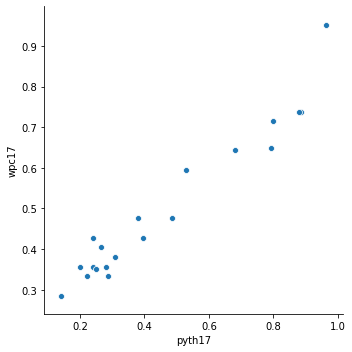

In [11]:
# Plot the data

sns.relplot(x="pyth17", y="wpc17", data =EPL17)

In [12]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc17 ~ pyth17', data=EPL17).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wpc17   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     269.6
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           2.81e-12
Time:                        12:10:12   Log-Likelihood:                 33.822
No. Observations:                  20   AIC:                            -63.64
Df Residuals:                      18   BIC:                            -61.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1978      0.021      9.335      0.000       0.153       0.242
pyth17         0.6551      0.040     16.420      0.000       0.571       0.739
==============================================================================
Omnibus:                        6.775   Durbin-Watson:                   2.095
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                4.322
Skew:                           1.048   Prob(JB):                        0.115
Kurtosis:                       3.891   Cond. No.                         4.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 7 (=Step 4 (away team))

In [13]:
EPL2018home = EPL2018.groupby(['HomeTeam'])['count','hwinvalue', 'FTHG','FTAG'].sum().reset_index()
EPL2018home = EPL2018home.rename(columns={'HomeTeam':'team','count':'Ph','FTHG':'FTHGh','FTAG':'FTAGh'})
EPL2018home

,team,Ph,hwinvalue,FTHGh,FTAGh
0,Arsenal,9,7.5,29,10
1,Bournemouth,8,5.0,12,13
2,Brighton,9,5.5,14,13
3,Burnley,9,3.5,9,11
4,Chelsea,8,4.5,9,9
5,Crystal Palace,8,4.5,15,9
6,Everton,9,5.5,11,9
7,Huddersfield,8,2.5,6,13
8,Leicester,9,5.0,12,8
9,Liverpool,8,7.0,24,6


In [14]:
EPL2018away = EPL2018.groupby('AwayTeam')['count','awinvalue', 'FTHG','FTAG'].sum().reset_index()
EPL2018away = EPL2018away.rename(columns={'AwayTeam':'team','count':'Pa','FTHG':'FTHGa','FTAG':'FTAGa'})
EPL2018away

,team,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,8,1.0,15,7
1,Bournemouth,9,4.0,16,13
2,Brighton,8,1.5,16,5
3,Burnley,8,4.0,11,9
4,Chelsea,9,4.5,15,14
5,Crystal Palace,9,4.5,14,12
6,Everton,8,2.5,17,8
7,Huddersfield,9,2.5,13,4
8,Leicester,8,2.5,20,13
9,Liverpool,9,5.0,8,12


## Step 7 (=Step 5 (away team))

In [15]:
EPL2018 = pd.merge(EPL2018home, EPL2018away, on = ['team'])
EPL2018

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa
0,Arsenal,9,7.5,29,10,8,1.0,15,7
1,Bournemouth,8,5.0,12,13,9,4.0,16,13
2,Brighton,9,5.5,14,13,8,1.5,16,5
3,Burnley,9,3.5,9,11,8,4.0,11,9
4,Chelsea,8,4.5,9,9,9,4.5,15,14
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12
6,Everton,9,5.5,11,9,8,2.5,17,8
7,Huddersfield,8,2.5,6,13,9,2.5,13,4
8,Leicester,9,5.0,12,8,8,2.5,20,13
9,Liverpool,8,7.0,24,6,9,5.0,8,12


## Step 7 (=Step 6 (away team))

In [16]:
EPL2018['W'] = EPL2018['hwinvalue']+EPL2018['awinvalue']
EPL2018['G'] = EPL2018['Ph']+EPL2018['Pa']
EPL2018['GF'] = EPL2018['FTHGh']+EPL2018['FTAGa']
EPL2018['GA'] = EPL2018['FTAGh']+EPL2018['FTHGa']
EPL2018

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA
0,Arsenal,9,7.5,29,10,8,1.0,15,7,8.5,17,36,25
1,Bournemouth,8,5.0,12,13,9,4.0,16,13,9.0,17,25,29
2,Brighton,9,5.5,14,13,8,1.5,16,5,7.0,17,19,29
3,Burnley,9,3.5,9,11,8,4.0,11,9,7.5,17,18,22
4,Chelsea,8,4.5,9,9,9,4.5,15,14,9.0,17,23,24
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12,9.0,17,27,23
6,Everton,9,5.5,11,9,8,2.5,17,8,8.0,17,19,26
7,Huddersfield,8,2.5,6,13,9,2.5,13,4,5.0,17,10,26
8,Leicester,9,5.0,12,8,8,2.5,20,13,7.5,17,25,28
9,Liverpool,8,7.0,24,6,9,5.0,8,12,12.0,17,36,14


In [17]:
# Create the win percentage and Pythagorean Expectation

EPL2018['wpc18'] = EPL2018['W']/EPL2018['G']
EPL2018['pyth18'] = EPL2018['GF']**2/(EPL2018['GF']**2 + EPL2018['GA']**2)
EPL2018

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA,wpc18,pyth18
0,Arsenal,9,7.5,29,10,8,1.0,15,7,8.5,17,36,25,0.500000,0.674649
1,Bournemouth,8,5.0,12,13,9,4.0,16,13,9.0,17,25,29,0.529412,0.426330
2,Brighton,9,5.5,14,13,8,1.5,16,5,7.0,17,19,29,0.411765,0.300333
3,Burnley,9,3.5,9,11,8,4.0,11,9,7.5,17,18,22,0.441176,0.400990
4,Chelsea,8,4.5,9,9,9,4.5,15,14,9.0,17,23,24,0.529412,0.478733
5,Crystal Palace,8,4.5,15,9,9,4.5,14,12,9.0,17,27,23,0.529412,0.579491
6,Everton,9,5.5,11,9,8,2.5,17,8,8.0,17,19,26,0.470588,0.348120
7,Huddersfield,8,2.5,6,13,9,2.5,13,4,5.0,17,10,26,0.294118,0.128866
8,Leicester,9,5.0,12,8,8,2.5,20,13,7.5,17,25,28,0.441176,0.443577
9,Liverpool,8,7.0,24,6,9,5.0,8,12,12.0,17,36,14,0.705882,0.868633


## Optional steps, not required for Assessment

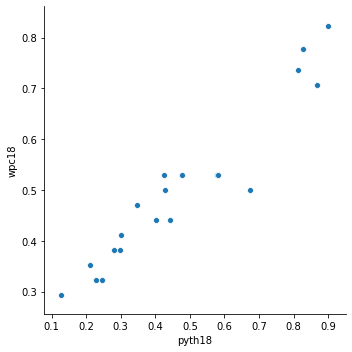

In [18]:
# Plot the data

sns.relplot(x="pyth18", y="wpc18", data =EPL2018)

In [19]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc18 ~ pyth18', data=EPL2018).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wpc18   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     191.1
Date:                Wed, 02 Dec 2020   Prob (F-statistic):           5.02e-11
Time:                        12:10:13   Log-Likelihood:                 34.030
No. Observations:                  20   AIC:                            -64.06
Df Residuals:                      18   BIC:                            -62.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2040      0.024      8.586      0.000       0.154       0.254
pyth18         0.6237      0.045     13.823      0.000       0.529       0.718
==============================================================================
Omnibus:                        5.199   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.074   Jarque-Bera (JB):                2.933
Skew:                          -0.826   Prob(JB):                        0.231
Kurtosis:                       3.890   Cond. No.                         5.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step 8

In [20]:
Half2predictor = pd.merge(EPL17,EPL2018[['team','wpc18','pyth18']], on='team')
Half2predictor

,team,Ph,hwinvalue,FTHGh,FTAGh,Pa,awinvalue,FTHGa,FTAGa,W,G,GF,GA,wpc17,pyth17,wpc18,pyth18
0,Arsenal,10,8.5,25,10,11,5.0,16,13,13.5,21,38,26,0.642857,0.681132,0.500000,0.674649
1,Bournemouth,11,4.5,14,17,10,3.0,15,6,7.5,21,20,32,0.357143,0.280899,0.529412,0.426330
2,Brighton,10,5.5,10,12,11,3.0,13,5,8.5,21,15,25,0.404762,0.264706,0.411765,0.300333
3,Burnley,10,6.0,7,6,11,6.5,11,11,12.5,21,18,17,0.595238,0.528548,0.441176,0.400990
4,Chelsea,11,8.5,21,7,10,7.0,7,18,15.5,21,39,14,0.738095,0.885847,0.529412,0.478733
5,Crystal Palace,11,5.0,14,18,10,2.5,14,4,7.5,21,18,32,0.357143,0.240356,0.529412,0.579491
6,Everton,10,6.5,17,13,11,3.5,19,8,10.0,21,25,32,0.476190,0.379018,0.470588,0.348120
7,Huddersfield,11,6.0,10,12,10,3.0,20,8,9.0,21,18,32,0.428571,0.240356,0.294118,0.128866
8,Leicester,10,5.0,13,14,11,5.0,18,18,10.0,21,31,32,0.476190,0.484131,0.441176,0.443577
9,Liverpool,11,8.5,21,4,10,6.5,20,27,15.0,21,48,24,0.714286,0.800000,0.705882,0.868633


## Step 9

In [21]:
keyvars = Half2predictor[['team','wpc17','wpc18','pyth17','pyth18']]
keyvars.corr()

,wpc17,wpc18,pyth17,pyth18
wpc17,1.000000,0.756573,0.968204,0.745832
wpc18,0.756573,1.000000,0.795693,0.955986
pyth17,0.968204,0.795693,1.000000,0.795331
pyth18,0.745832,0.955986,0.795331,1.000000


## Optional steps, not required for Assessment

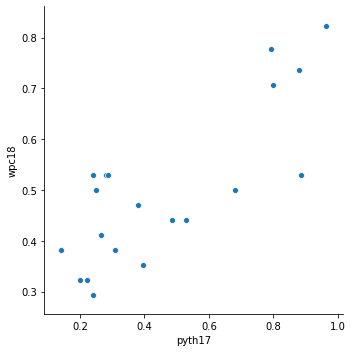

In [22]:
sns.relplot(x="pyth17", y="wpc18", data =Half2predictor)

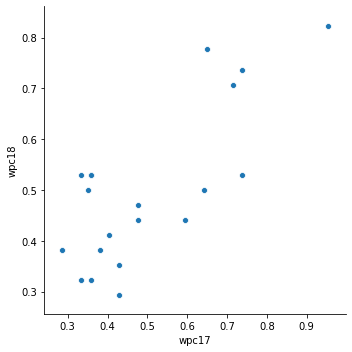

In [23]:
sns.relplot(x="wpc17", y="wpc18", data =Half2predictor)

Now you have completed the assignment, are these results consistent with those we found for Major League Baseball?